In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spicy import stats

In [11]:
df = pd.read_csv(r'dataset/scores_data.csv')

In [12]:
df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7


# Preprocessing

In [13]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [15]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [16]:
# Column names contains blank spaces -> Apply strip() function to remove spaces
df.columns = df.columns.str.strip() 
print(df.columns)
df

Index(['Batch', 'User_ID', 'Score'], dtype='object')


,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7


In [17]:
# Score column dtype = object -> should make it int
# Convert "x / 7" → integer score
df['Score'] = df['Score'].str.split('/').str[0].astype(int)

In [18]:
df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6
1,AI_ELITE_7,uid_148,6
2,AI_ELITE_7,uid_147,7
3,AI_ELITE_7,uid_146,7
4,AI_ELITE_7,uid_145,4
...,...,...,...
144,AI_ELITE_4,uid_5,4
145,AI_ELITE_4,uid_4,4
146,AI_ELITE_4,uid_3,4
147,AI_ELITE_4,uid_2,3


In [19]:
df.dtypes

Batch      object
User_ID    object
Score       int64
dtype: object

In [20]:
#Check for null values / missing values
df.isnull().sum()

Batch      0
User_ID    0
Score      0
dtype: int64

In [21]:
#check for score outliers -> scores that are not in range 0 , 7 
df['Score'].between(0,7).all()

np.True_

In [22]:
df['Batch'].nunique()

3

# Analysis and Visualization

In [23]:
df['Batch'].value_counts()     #This shows that data is evenly distributed - No sample size bias

Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64

In [24]:
batch_stats = df.groupby('Batch')['Score'].agg(                             
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
)
batch_stats                 #This indicates AI_ELITE_7 has the best performance

,count,mean,median,std,min,max
Batch,,,,,,
AI_ELITE_4,48,3.791667,4.0,1.443376,0,7
AI_ELITE_6,48,4.229167,4.0,1.640441,0,7
AI_ELITE_7,53,5.056604,5.0,1.446682,2,7


In [25]:
df.groupby(['Batch','Score']).size().unstack(fill_value=0)

Score,0,1,2,3,4,5,6,7
Batch,,,,,,,,
AI_ELITE_4,1,1,7,8,19,8,1,3
AI_ELITE_6,1,2,3,9,11,13,4,5
AI_ELITE_7,0,0,2,7,10,11,13,10


In [26]:
bins = [0,3,5,7]
labels = ['Low','Medium','High']
df['Performance'] = pd.cut(df['Score'], bins=bins, labels=labels)
df

,Batch,User_ID,Score,Performance
0,AI_ELITE_7,uid_149,6,High
1,AI_ELITE_7,uid_148,6,High
2,AI_ELITE_7,uid_147,7,High
3,AI_ELITE_7,uid_146,7,High
4,AI_ELITE_7,uid_145,4,Medium
...,...,...,...,...
144,AI_ELITE_4,uid_5,4,Medium
145,AI_ELITE_4,uid_4,4,Medium
146,AI_ELITE_4,uid_3,4,Medium
147,AI_ELITE_4,uid_2,3,Low


In [27]:
perf_counts = (df.groupby(['Batch', 'Performance']).size().unstack(fill_value=0))
perf_counts

C:\Users\shara\AppData\Local\Temp\ipykernel_12852\1025891215.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  perf_counts = (df.groupby(['Batch', 'Performance']).size().unstack(fill_value=0))


Performance,Low,Medium,High
Batch,,,
AI_ELITE_4,16,27,4
AI_ELITE_6,14,24,9
AI_ELITE_7,9,21,23


In [28]:
perf_percent = perf_counts.div(perf_counts.sum(axis=1), axis=0) * 100
perf_percent

Performance,Low,Medium,High
Batch,,,
AI_ELITE_4,34.042553,57.446809,8.510638
AI_ELITE_6,29.787234,51.063830,19.148936
AI_ELITE_7,16.981132,39.622642,43.396226


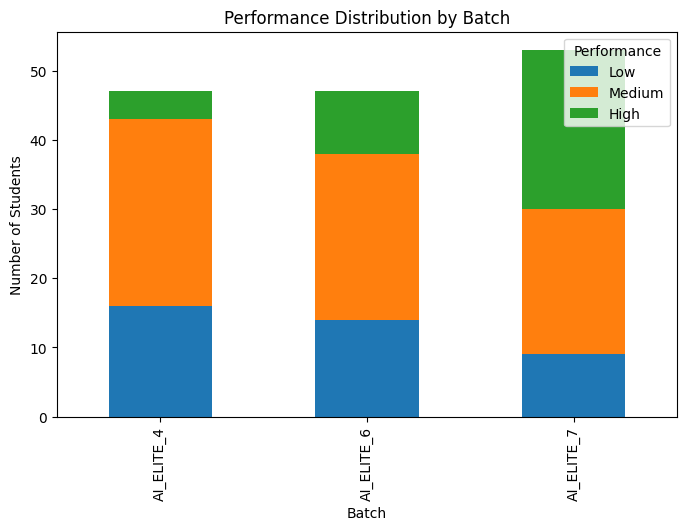

In [29]:
perf_counts.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Performance Distribution by Batch')
plt.ylabel('Number of Students')
plt.show()

In [30]:
skewness = df.groupby('Batch')['Score'].skew()

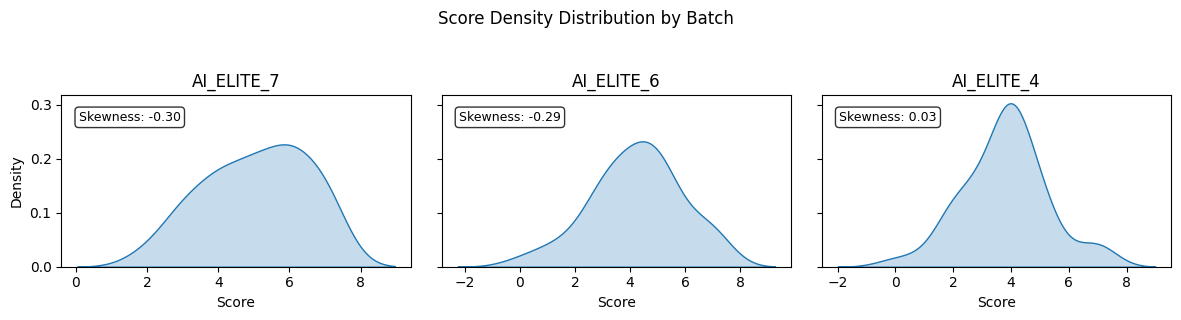

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

batches = df['Batch'].unique()

fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

for ax, batch in zip(axes, batches):
    subset = df[df['Batch'] == batch]
    
    sns.kdeplot(
        subset['Score'],
        fill=True,          
        ax=ax
    )
    
    ax.set_title(batch)
    ax.set_xlabel('Score')
    
    # Add skewness annotation
    ax.text(
        0.05, 0.85,
        f"Skewness: {skewness[batch]:.2f}",
        transform=ax.transAxes,
        fontsize=9,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
    )

axes[0].set_ylabel('Density')
plt.suptitle('Score Density Distribution by Batch', y=1.05)
plt.tight_layout()
plt.show()


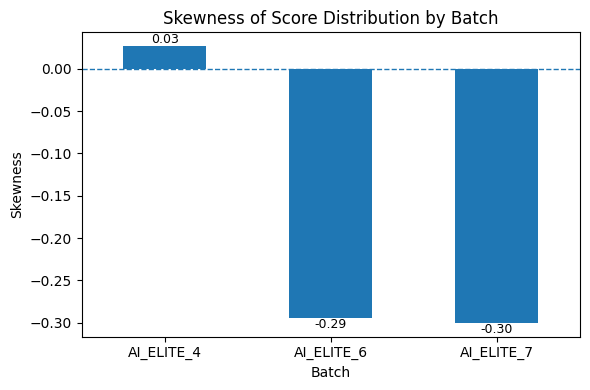

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

skewness.plot(kind='bar')

plt.axhline(0, linestyle='--', linewidth=1)  # reference line
plt.title('Skewness of Score Distribution by Batch')
plt.ylabel('Skewness')
plt.xlabel('Batch')

plt.xticks(rotation=0)
for i, value in enumerate(skewness):
    plt.text(i, value, f'{value:.2f}',
             ha='center',
             va='bottom' if value >= 0 else 'top',
             fontsize=9)

plt.tight_layout()
plt.show()

In [33]:
var = df.groupby('Batch')['Score'].var()
var

Batch
AI_ELITE_4    2.083333
AI_ELITE_6    2.691046
AI_ELITE_7    2.092888
Name: Score, dtype: float64

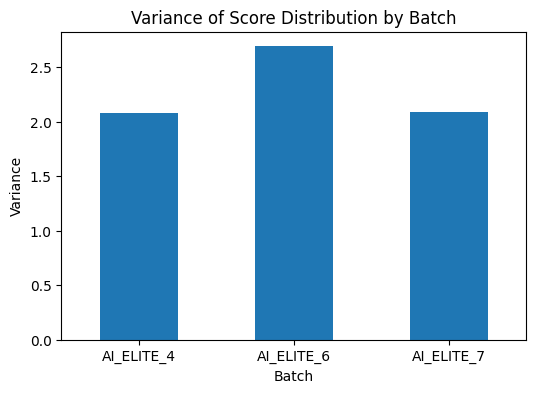

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

var.plot(kind='bar')

plt.title('Variance of Score Distribution by Batch')
plt.ylabel('Variance')
plt.xlabel('Batch')

plt.xticks(rotation = 0)

plt.show()


In [35]:
import pandas as pd

Q1 = df.groupby('Batch')['Score'].quantile(0.25)
Q3 = df.groupby('Batch')['Score'].quantile(0.75)
IQR = Q3 - Q1

outlier_bounds = pd.DataFrame({'Q1': Q1,'Q3': Q3,'IQR': IQR,'Lower_Bound': Q1 - 1.5 * IQR,'Upper_Bound': Q3 + 1.5 * IQR})

outlier_bounds


,Q1,Q3,IQR,Lower_Bound,Upper_Bound
Batch,,,,,
AI_ELITE_4,3.0,4.25,1.25,1.125,6.125
AI_ELITE_6,3.0,5.00,2.00,0.000,8.000
AI_ELITE_7,4.0,6.00,2.00,1.000,9.000


In [36]:
outliers = df.merge(outlier_bounds, on='Batch')         # To extract students whose scores lie outside IQR Bounds

outliers = outliers[
    (outliers['Score'] < outliers['Lower_Bound']) |
    (outliers['Score'] > outliers['Upper_Bound'])
]

outliers[['Batch', 'User_ID', 'Score']]


,Batch,User_ID,Score
101,AI_ELITE_4,uid_48,7
105,AI_ELITE_4,uid_44,7
129,AI_ELITE_4,uid_20,1
135,AI_ELITE_4,uid_14,0
139,AI_ELITE_4,uid_10,7


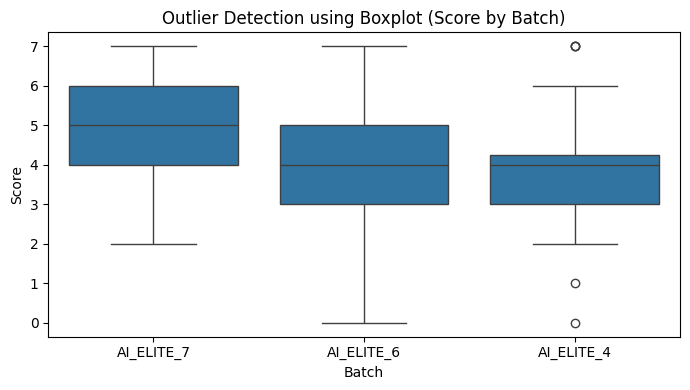

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.boxplot(x='Batch', y='Score', data=df)
plt.title('Outlier Detection using Boxplot (Score by Batch)')
plt.xlabel('Batch')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


In [38]:
batch_stats

,count,mean,median,std,min,max
Batch,,,,,,
AI_ELITE_4,48,3.791667,4.0,1.443376,0,7
AI_ELITE_6,48,4.229167,4.0,1.640441,0,7
AI_ELITE_7,53,5.056604,5.0,1.446682,2,7


In [39]:
batch_stats.sort_values(by='mean', ascending=False)

,count,mean,median,std,min,max
Batch,,,,,,
AI_ELITE_7,53,5.056604,5.0,1.446682,2,7
AI_ELITE_6,48,4.229167,4.0,1.640441,0,7
AI_ELITE_4,48,3.791667,4.0,1.443376,0,7


In [40]:
batch_stats.sort_values(by='std', ascending=True)

,count,mean,median,std,min,max
Batch,,,,,,
AI_ELITE_4,48,3.791667,4.0,1.443376,0,7
AI_ELITE_7,53,5.056604,5.0,1.446682,2,7
AI_ELITE_6,48,4.229167,4.0,1.640441,0,7


In [42]:
ranking_summary = pd.DataFrame({
    'Best Performance': ['AI_ELITE_7'],
    'Most Consistent': ['AI_ELITE_4'],
    'Needs Intervention': ['AI_ELITE_6']
})

ranking_summary

,Best Performance,Most Consistent,Needs Intervention
0,AI_ELITE_7,AI_ELITE_4,AI_ELITE_6
